In [4]:
import keras
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
from IPython.display import display

Using TensorFlow backend.


In [5]:
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions

In [45]:
def grab_image_flatten(img_path_base, index, numImages):
    #Desired image dimension (image will be square ie # by # pixels)
    imageDim = 100
    
    if (index<10):
        img_path = img_path_base+"000"+str(index)+"_model.png"
    elif (index<100 and index >=10):
        img_path = img_path_base+"00"+str(index)+"_model.png"
    elif (index<1000 and index>=100):
        img_path = img_path_base+"0"+str(index)+"_model.png"
    elif (index<10000 and index>=1000):
        img_path = img_path_base+str(index)+"_model.png"
        
    img = image.load_img(img_path, target_size=(imageDim, imageDim), color_mode = "grayscale")
    x = image.img_to_array(img)
    x = x.flatten()
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

def grab_image_full(img_path_base, index, numImages):
    #Desired image dimension (image will be square ie # by # pixels)
    imageDim = 100
    
    if (index<10):
        img_path = img_path_base+"000"+str(index)+"_model.png"
    elif (index<100 and index >=10):
        img_path = img_path_base+"00"+str(index)+"_model.png"
    elif (index<1000 and index>=100):
        img_path = img_path_base+"0"+str(index)+"_model.png"
    elif (index<10000 and index>=1000):
        img_path = img_path_base+str(index)+"_model.png"
        
    img = image.load_img(img_path, target_size=(imageDim, imageDim), color_mode = "grayscale")
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

#Num of images to read in
numImages = 600
X = np.concatenate([grab_image_flatten('/home/atm4w/Project/Data/miscImgs/',i, numImages) for i in range(numImages)]) 
X /= 255.0
Xoriginal = np.concatenate([grab_image_full('/home/atm4w/Project/Data/miscImgs/',i, numImages) for i in range(numImages)]) 
Xoriginal /= 255.0

display(X.shape)
display(Xoriginal.shape)

(600, 10000)

(600, 100, 100, 1)

In [46]:
Y = np.loadtxt('/home/atm4w/Project/Data/miscImgs/scores/humanScores.txt')
display(Y.shape)
display(Y[0:10])

(1294,)

array([0.945946, 0.941176, 0.918919, 0.916667, 0.916667, 0.914286,
       0.914286, 0.911765, 0.891892, 0.885714])

In [47]:
p = np.random.permutation(len(X))
X_original_shuffled = Xoriginal[p]
Xshuffled = X[p]
Yshuffled = Y[p]

display(X_original_shuffled.shape)
display(Xshuffled.shape)
display(Yshuffled.shape)

(600, 100, 100, 1)

(600, 10000)

(600,)

In [48]:
x_train = Xshuffled[0:(round(numImages*.85)),:]
y_train = Yshuffled[0:(round(numImages*.85))]
x_original_train = X_original_shuffled[0:(round(numImages*.85)),:,:]
x_test = Xshuffled[(round(numImages*.85)): , :]
y_test = Yshuffled[(round(numImages*.85)):]
x_original_test = X_original_shuffled[(round(numImages*.85)): , : , :]

display(x_train.shape)
display(y_train.shape)
display(x_original_train.shape)
display(x_test.shape)
display(y_test.shape)
display(x_original_test.shape)

(510, 10000)

(510,)

(510, 100, 100, 1)

(90, 10000)

(90,)

(90, 100, 100, 1)

In [49]:
model = keras.Sequential()

input_size = x_train.shape[1]
model.add(keras.layers.Dense(1, activation='sigmoid', input_shape=[input_size]))

model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['mse'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 10001     
Total params: 10,001
Trainable params: 10,001
Non-trainable params: 0
_________________________________________________________________


In [50]:
batch_size = 10
epochs = 250
history = model.fit(x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0,
    validation_split = 0.3)

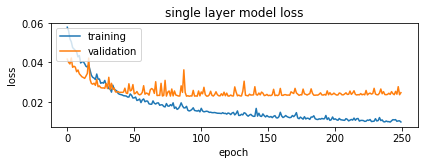

In [52]:
plt.figure()
#* summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('single layer model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.tight_layout()
plt.show()

In [53]:
loss = history.history['loss']
val_loss = history.history['val_loss']
print("Training loss final")
print(loss[-1])
print("Validation loss final")
print(val_loss[-1])

Training loss final
0.009963299730839599
Validation loss final
0.024765239431967144


In [54]:
preds = model.predict(x_test)
diff = preds.flatten() - (y_test)
print("Mean difference")
print("---------------")
display(np.mean(np.abs(diff)))

Mean difference
---------------


0.10909678202708031

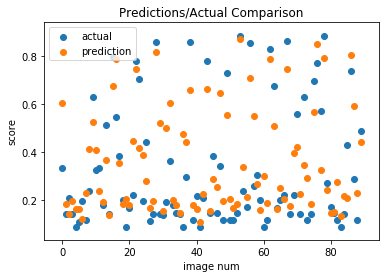

<Figure size 14400x1440 with 0 Axes>

In [55]:
#display(preds)
#display(y_test)
#display(diff)
shuffledInd = np.linspace(0,(numImages-round(numImages*.85))-1,num = numImages-(round(numImages*.85)))

plt.figure()
plt.scatter(shuffledInd, y_test)
plt.scatter(shuffledInd, preds)
plt.title("Predictions/Actual Comparison")
plt.ylabel("score")
plt.xlabel("image num")
plt.legend(['actual', 'prediction'], loc='upper left')
#plt.subplot(212)
#plt.scatter(y_test, preds)
#plt.title("Predicted vs Actual value")
#plt.ylabel("predicted value")
#plt.xlabel("actual value")
plt.figure(figsize=(200,20))
plt.show()

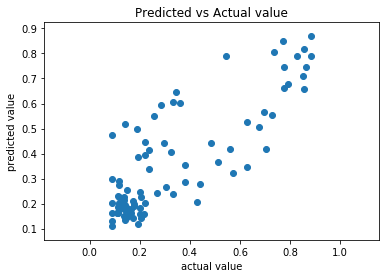

In [56]:
plt.figure()
plt.scatter(y_test, preds)
plt.title("Predicted vs Actual value")
plt.ylabel("predicted value")
plt.xlabel("actual value")
plt.axis('equal')
plt.show()

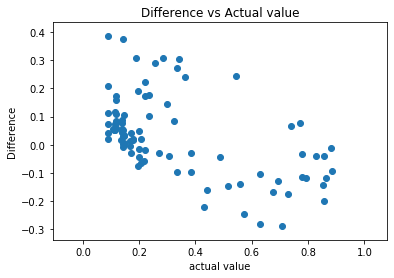

In [57]:
plt.figure()
plt.scatter(y_test, diff)
plt.title("Difference vs Actual value")
plt.ylabel("Difference")
plt.xlabel("actual value")
plt.axis('equal')
plt.show()

In [58]:
absDiff = np.abs(diff)

top10 = np.argpartition(absDiff, -10)[-10:]
bottom5= np.argpartition(absDiff, 5)[:5]
display(top10)
display(bottom5)
for i in range (10):
    print("Human Score")
    display(y_test[top10[i]])
    print("Prediction")
    display(preds[top10[i]][0])
    print("---------------")

array([77,  0, 72, 31, 57, 47, 23, 87, 36, 29])

array([81, 35, 64, 44, 14])

Human Score


0.571429

Prediction


0.3238755

---------------
Human Score


0.333333

Prediction


0.60449827

---------------
Human Score


0.628571

Prediction


0.34642988

---------------
Human Score


0.189189

Prediction


0.4984533

---------------
Human Score


0.257143

Prediction


0.5484176

---------------
Human Score


0.342857

Prediction


0.6477901

---------------
Human Score


0.705882

Prediction


0.4170678

---------------
Human Score


0.285714

Prediction


0.59261274

---------------
Human Score


0.088235

Prediction


0.47396162

---------------
Human Score


0.142857

Prediction


0.5189878

---------------


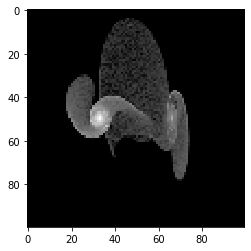

Human Score


0.675676

Prediction


0.47924867

In [19]:
plt.imshow(image.array_to_img(x_original_test[top10[0],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[0]])
print("Prediction")
display(preds[top10[0]][0])

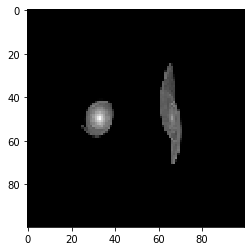

Human Score


0.388889

Prediction


0.19030757

In [20]:
plt.imshow(image.array_to_img(x_original_test[top10[1],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[1]])
print("Prediction")
display(preds[top10[1]][0])

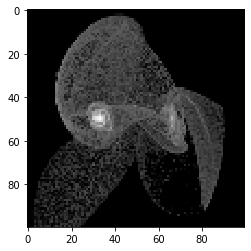

Human Score


0.205882

Prediction


0.41685623

In [21]:
plt.imshow(image.array_to_img(x_original_test[top10[2],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[2]])
print("Prediction")
display(preds[top10[2]][0])

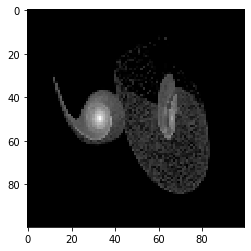

Human Score


0.72973

Prediction


0.5134819

In [22]:
plt.imshow(image.array_to_img(x_original_test[top10[3],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[3]])
print("Prediction")
display(preds[top10[3]][0])

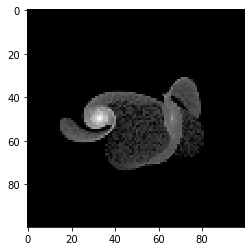

Human Score


0.861111

Prediction


0.6359085

In [23]:
plt.imshow(image.array_to_img(x_original_test[top10[4],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[4]])
print("Prediction")
display(preds[top10[4]][0])

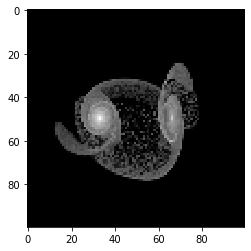

Human Score


0.628571

Prediction


0.21929733

In [24]:
plt.imshow(image.array_to_img(x_original_test[top10[5],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[5]])
print("Prediction")
display(preds[top10[5]][0])

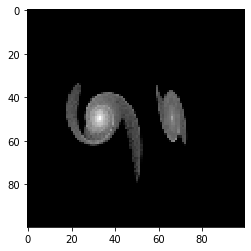

Human Score


0.285714

Prediction


0.53010535

In [41]:
plt.imshow(image.array_to_img(x_original_test[top10[6],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[6]])
print("Prediction")
display(preds[top10[6]][0])

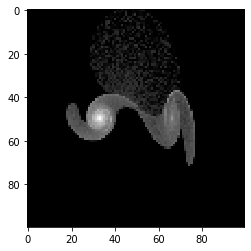

Human Score


0.941176

Prediction


0.57746303

In [42]:
plt.imshow(image.array_to_img(x_original_test[top10[7],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[7]])
print("Prediction")
display(preds[top10[7]][0])

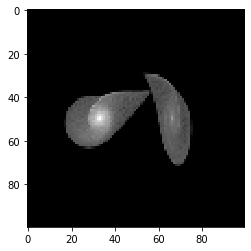

Human Score


0.111111

Prediction


0.35789335

In [43]:
plt.imshow(image.array_to_img(x_original_test[top10[8],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[8]])
print("Prediction")
display(preds[top10[8]][0])

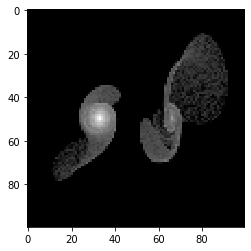

Human Score


0.676471

Prediction


0.21660218

In [44]:
plt.imshow(image.array_to_img(x_original_test[top10[9],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[9]])
print("Prediction")
display(preds[top10[9]][0])

In [30]:
display("--------------------")

'--------------------'

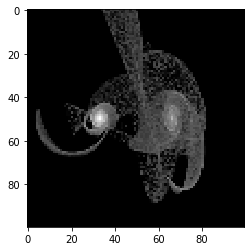

Human Score


0.514286

Prediction


0.5093597

In [31]:
plt.imshow(image.array_to_img(x_original_test[bottom5[0],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[bottom5[0]])
print("Prediction")
display(preds[bottom5[0]][0])

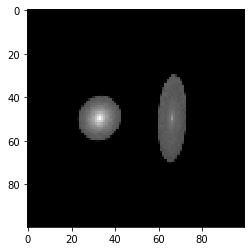

Human Score


0.138889

Prediction


0.13706823

In [32]:
plt.imshow(image.array_to_img(x_original_test[bottom5[1],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[bottom5[1]])
print("Prediction")
display(preds[bottom5[1]][0])

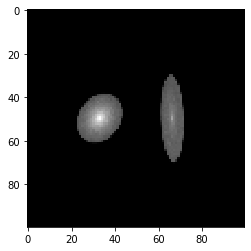

Human Score


0.138889

Prediction


0.1320682

In [33]:
plt.imshow(image.array_to_img(x_original_test[bottom5[2],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[bottom5[2]])
print("Prediction")
display(preds[bottom5[2]][0])

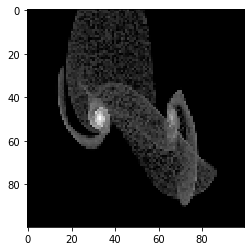

Human Score


0.5

Prediction


0.5079519

In [34]:
plt.imshow(image.array_to_img(x_original_test[bottom5[3],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[bottom5[3]])
print("Prediction")
display(preds[bottom5[3]][0])

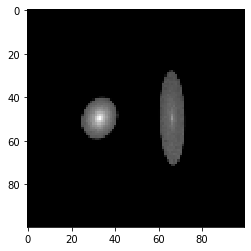

Human Score


0.142857

Prediction


0.15097728

In [35]:
plt.imshow(image.array_to_img(x_original_test[bottom5[4],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[bottom5[4]])
print("Prediction")
display(preds[bottom5[4]][0])

In [59]:
maxPred = np.amax(preds, axis=0)
maxPredIndex = np.where(preds == maxPred)
display(maxPred[0])
display(maxPredIndex[0][0])

0.87086815

53

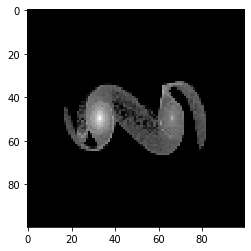

Human Score


0.882353

Prediction


0.87086815

In [60]:
plt.imshow(image.array_to_img(x_original_test[maxPredIndex[0][0],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[maxPredIndex[0][0]])
print("Prediction")
display(preds[maxPredIndex[0][0]][0])

In [61]:
weights = model.get_weights()[0]
display(weights.shape)
l1 = weights[:,0]
display(l1.shape)

(10000, 1)

(10000,)

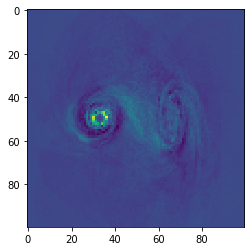

In [62]:
def view_weights( model, saveLoc = None ):
    weights = model.get_weights()[0]
    l1 = weights[:,0]
    #(100,100) dependent on image size
    l1 = np.reshape( l1, (100,100) )

    plt.imshow(l1)
    plt.show()
    
    if saveLoc != None:
        plt.savefig( saveLoc )
    
view_weights(model)

In [40]:
model.save("atm4wCurSingleModel")